### Linear least square fitting
We want to fit a parametrized function $g(x)=g(x;\{a_1,a_2,...,a_{M_p}\})=g(x;\{a_m\})$ to the data where $a_i$'s are the parameters and $x$ is the independent variables. As a measure of how well the function fits the data, choose 

$\chi^2:= \sum_{i=1}^{N_d} \left( \frac{y_i-g(x_i;\{a_m\})}{\sigma_i}\right)^2$

Where we sum over $N_d$ data points $(x_i,y_i\pm\sigma_i)$ and $\sigma_i$ is the error in measurement of $y_i$. In order to achieve the best fit, we choose the parameters that minimize the measure $\chi_i$. This results in $M_p$ simultaneous equations:
\begin{equation}
\frac{\partial \chi^2}{\partial a_m} =0,\quad \Rightarrow \sum_{i=1}^{N_d}\frac{y_i-g(x_i;\{a_m\})}{\sigma_i^2}\frac{\partial g(x_i)}{\partial a_m}=0, \quad \forall m=1,...,M_p
\end{equation}
A solution represents the maximum likelihood that the deduced parameters provide a correct description of the data for the theoretical function $g(x)$.

#### Fitting exponential Decay
Fit the exponential Decay data. We try to find the best fit line, the parameters here are $\tau$ and $\frac{\Delta N(0)}{\Delta t}$.

In [2]:
import matplotlib.pyplot as p 
from numpy import*; from numpy.linalg import inv, solve 

In [19]:
x=array([5.,15.,25.,35.,45.,55.,65.,75.,85.,95.,105.,115.,125.])
y=array([32.,17.,21.,5.25,5.35,5.12,4.9,2.,3.,0.,4.,1.,0.])
sig = array([1, 1, 2, 3, 2, 1, 1,2,1,1,1,1,0.9])

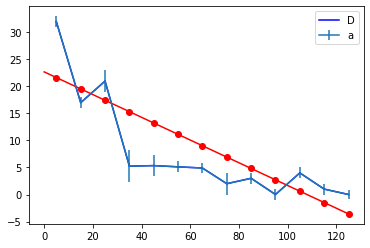

In [26]:
fig,ax = p.subplots()
ax.plot(x,y,'b-')
ax.errorbar(x,y,sig)
ax.legend('Data points')
s = sx = sy = sxx = sxy = 0
for i in range(0,size(x)):
    s+=1/(sig[i]**2)
    sx += x[i]/sig[i]**2
    sy += y[i]/sig[i]**2
    sxx += x[i]**2/sig[i]**2
    sxy += x[i]*y[i]/sig[i]**2
delta = s*sxx - sx**2
a1 = (sxx*sy-sx*sxy)/delta
a2 = (s*sxy-sx*sy)/delta

xRange = arange(0.0, 130.0, 5)    
# red line is the fit, red dots the fits at y[i]m 
curve  = a1 + a2*xRange
points = a1 + a2*x 
p.plot(xRange, curve,'r', x, points, 'ro')
p.show()

#### Quadratic fit (Fitting a parabola to the data)
When the polynomial $g(x)=a_1+a_2x+a_3x^2+...$ we want to fit depends linearly on the parameters $a_1, a_2,...$



 x via Inverse A
 [[ 1002.06558106 -2280.45983096  1269.8244017 ]
 [-1432.41585118  3291.93302443 -1847.84729682]
 [  483.14350806 -1119.31382351   633.40751278]] 


 x via Elimination 
 [-8.5698482  11.66987644 -2.76280268] 
 Fit to Parabola

y(x) = a0 + a1 x + a2 x^2
 a0 = -8.569848198879479 a1 = 11.669876436107684 a2 = -2.7628026787224815

 i   xi     yi    yfit   
 0 1.000  0.520  0.3372256
 1 1.100  0.800  0.9240246
 2 1.240  0.700  1.6527132
 3 1.350  1.800  2.1492771
 4 1.451  2.900  2.5463350
 5 1.500  2.900  2.7186604
 6 1.920  3.600  3.6515188


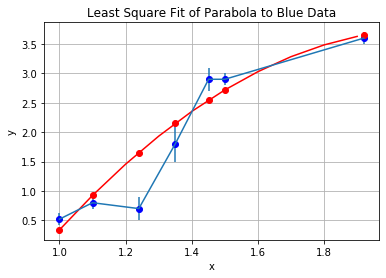

In [1]:
# Fit.py: Linear least square fit via matrix solution

import matplotlib.pyplot as p 
from numpy import*; from numpy.linalg import inv, solve 

Nd = 7
A = zeros((3,3), float);  bvec = zeros((3,1), float)  # Declare
ss= sx = sxx = sy = sxxx = sxxxx = sxy = sxy = sxxy = 0.
x = array([1., 1.1, 1.24, 1.35,  1.451, 1.5, 1.92])           
y = array([0.52, 0.8, 0.7, 1.8, 2.9, 2.9, 3.6])               
sig = array([0.1, 0.1, 0.2, 0.3, 0.2, 0.1, 0.1])    # Error bars
xRange = arange(1.0, 2.0, 0.1)                      # For plots
p.plot(x, y, 'bo')                                  # Blue data
p.errorbar(x,y,sig)                                      
p.title('Least Square Fit of Parabola to Blue Data')                           
p.xlabel('x');  p.ylabel('y');   p.grid(True)        # Plot grid

for i in range(0, Nd):                                      
    sig2 = sig[i] * sig[i]
    ss  += 1. / sig2; sx += x[i]/sig2; sy += y[i]/sig2
    rhl  = x[i] * x[i]; sxx += rhl/sig2;  sxxy += rhl*y[i]/sig2
    sxy += x[i]*y[i]/sig2; sxxx +=rhl*x[i]/sig2; sxxxx +=rhl*rhl/sig2
A    = array([ [ss,sx,sxx], [sx,sxx,sxxx], [sxx,sxxx,sxxxx] ])
bvec = array([sy, sxy, sxxy])
xvec = multiply(inv(A), bvec)                  # Invert matrix
print('\n x via Inverse A\n', xvec, '\n' )
xvec = solve(A, bvec)                   # Solve via elimination
print('\n x via Elimination \n', xvec, '\n Fit to Parabola\n') 
print('y(x) = a0 + a1 x + a2 x^2\n a0 =', xvec[0],'a1 =', xvec[1], 'a2 =', xvec[2])      
print('\n i   xi     yi    yfit   ')
for i in range(0, Nd):
    s = xvec[0] + xvec[1]*x[i] + xvec[2]*x[i]*x[i]
    print(" %d %5.3f  %5.3f  %8.7f"  %(i, x[i], y[i], s))
# red line is the fit, red dots the fits at y[i]m 
curve  = xvec[0] + xvec[1]*xRange + xvec[2]*xRange**2
points = xvec[0] + xvec[1]*x + xvec[2]*x**2
p.plot(xRange, curve,'r', x, points, 'ro')
p.show()